## US Visa Prediction Project

### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

### About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).



## 1. Problem statement.

- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.

- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

### In this project we are going to use the data given to build a Classification model:

- This model is to check if Visa get approved or not based on the given dataset.

- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

## 2. Data Collection.

- The Dataset is part of Office of Foreign Labor Certification (OFLC)

- The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r'D:\Project\project_structure\project-structure-ewb\data\raw\easyview.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


##### Shape of the dataset

In [3]:
df.shape

(25480, 12)

#### Summary of the dataset

In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Check Datatypes in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

### 3. EXPLORING DATA

#####  define numerical & categorical columns

In [9]:
numerical_features = [x for x in df.columns if df[x].dtypes != 'O']
categorical_features = [x for x in df.columns if df[x].dtypes == 'O'] 

print(f'There are total {len(numerical_features)} numerical columns : {numerical_features}\n')
print(f'There are total {len(categorical_features)} categorical columns : {categorical_features}')

There are total 3 numerical columns : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

There are total 9 categorical columns : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


##### proportion of count data on categorical columns

In [10]:
for i in categorical_features:
    print(df[i].value_counts(normalize=True)*100)
    print()

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64

has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64

requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64

region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64



In [11]:
print(f'shape of data : {df.shape[0]}\n')
print('number of unique category in each categorical column :\n')

for i in categorical_features:    
    print(i, '-> ', df[i].nunique())

shape of data : 25480

number of unique category in each categorical column :

case_id ->  25480
continent ->  6
education_of_employee ->  4
has_job_experience ->  2
requires_job_training ->  2
region_of_employment ->  5
unit_of_wage ->  4
full_time_position ->  2
case_status ->  2


#### Insights

1. `case_id` has all unique values.

2. `continent` column is highly biased towards asia.

3. `unit_of_wage` seems to be an important column as most of them are yearly contracts.

4. `requires_job_training` most of them are yes.

## Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### Other Type of Analysis are:
1. **Bivariate Analysis :** The analysis of two variables.

2. **Multivariate Analysis :** The analysis of two or more variables.

### Numerical Features

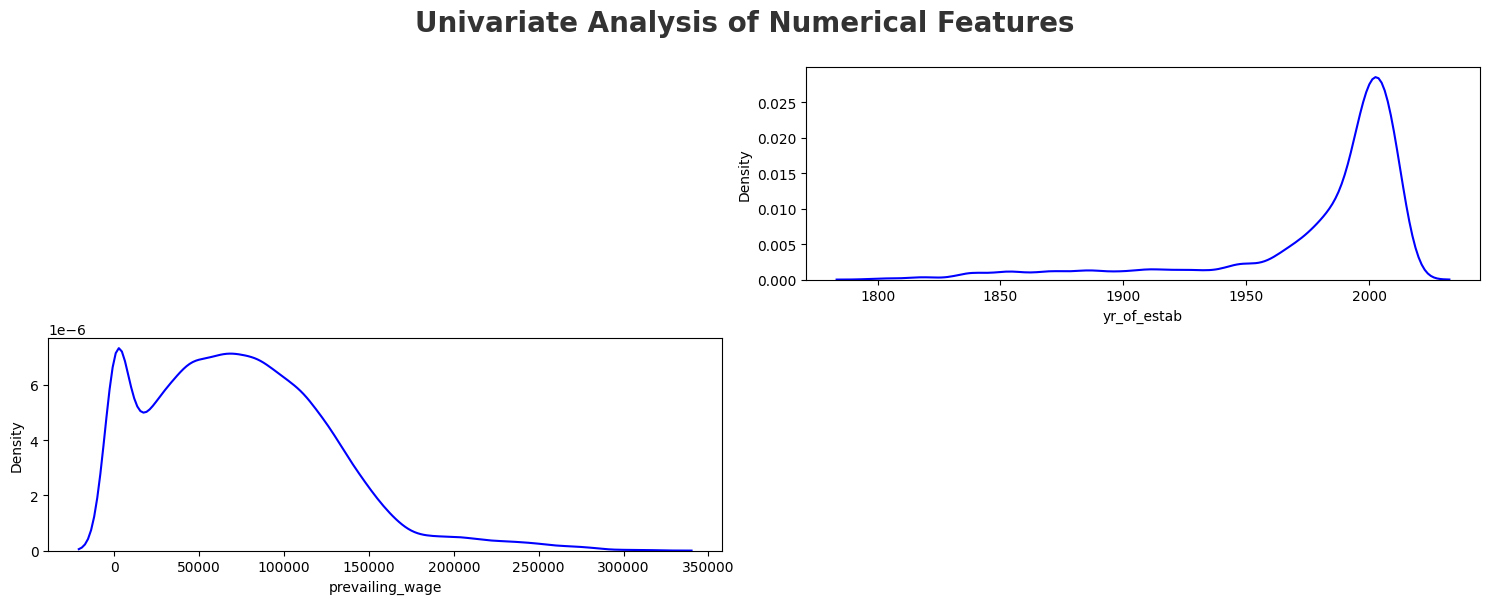

In [12]:
plt.figure(figsize=(15,6))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(1, len(numerical_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
# plt.show()

##### skewness of all numerical columns  :  

In [13]:
df[numerical_features].skew()

no_of_employees    12.265260
yr_of_estab        -2.037301
prevailing_wage     0.755776
dtype: float64

### Insights

1. **no_of_employees** column looks more skewed but it may be because of outlies.

2. **yr_of_estab** is a discrete feature.

3. **privailing-wage** is a right-skewed distribution.

### Categorical Features

In [14]:
categorical_features

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [15]:
cat = categorical_features[1:]
cat

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

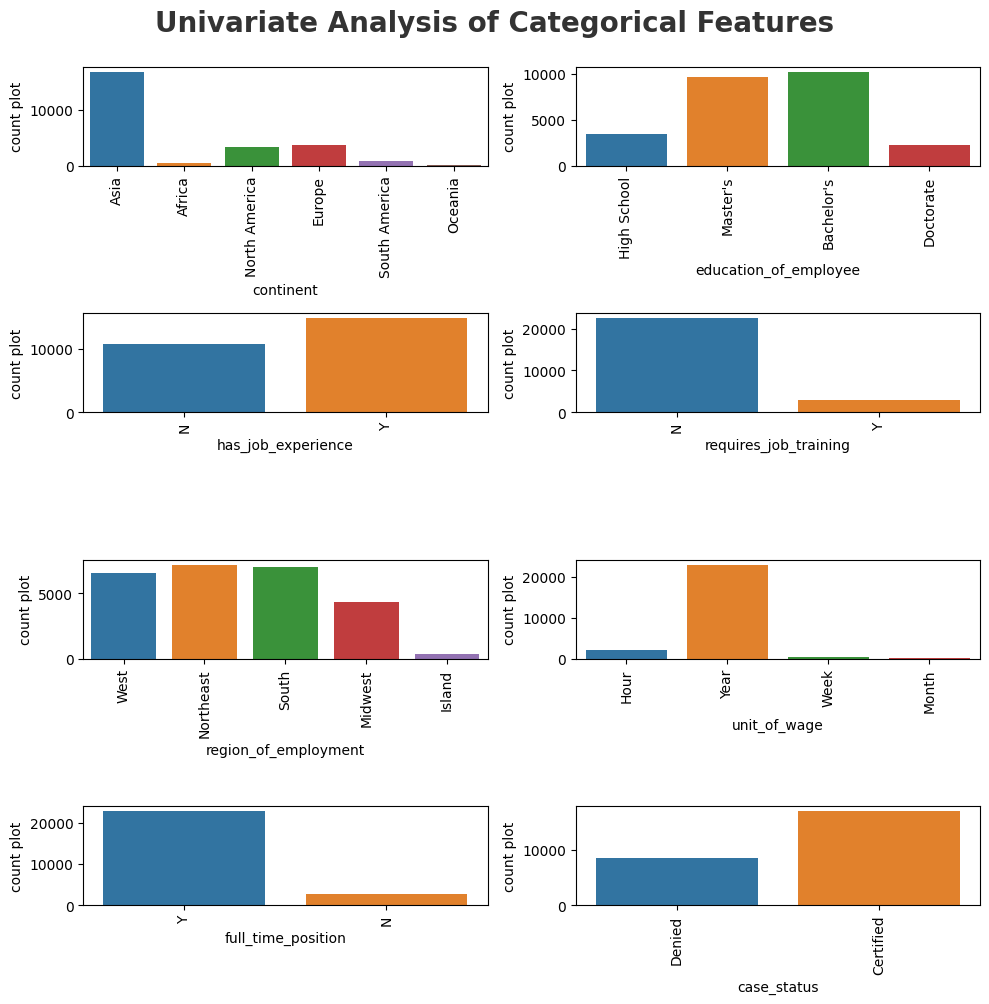

In [22]:

plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(cat)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[cat[i]])
    plt.xlabel(cat[i])
    plt.xticks(rotation='vertical')
    plt.ylabel('count plot')
    plt.tight_layout()

### OR

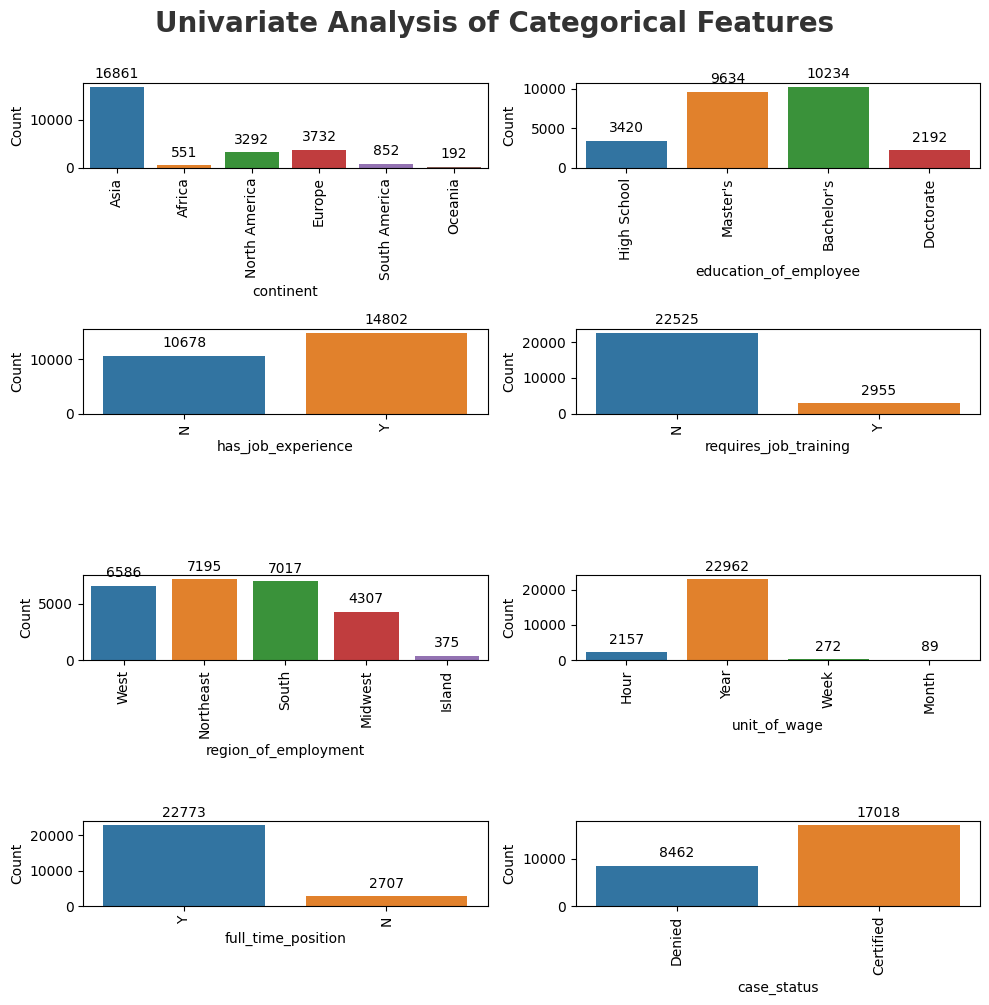

In [23]:
plt.figure(figsize=(10, 10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat)):
    plt.subplot(4, 2, i+1)
    
    # Create the count plot
    ax = sns.countplot(x=df[cat[i]])
    
    # Annotate the count on each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 9), 
                    textcoords='offset points', fontsize=10)
    
    plt.xlabel(cat[i])
    plt.xticks(rotation='vertical')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()


### Insights

1. **requires_job_training, unit_of_wage, full_time_position and continents** columns have signle category dominating.

2. Rest of the columns are balanced.

## Multivariate Analysis


- Multivariate analysis is the analysis of more than one variable.

In [27]:
numerical_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [38]:
continuous_features = [ x for x in numerical_features if df[x].nunique()>10]
discrete_features = [ x for x in numerical_features if df[x].nunique()<10]

print(f'There are total {len(continuous_features)} continuous columns : {continuous_features}\n')
print(f'There are total {len(discrete_features)} discrete columns : {discrete_features}')

There are total 3 continuous columns : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

There are total 0 discrete columns : []


### Check Multicollinearity in Numerical features

### 1. Correlation Matrix


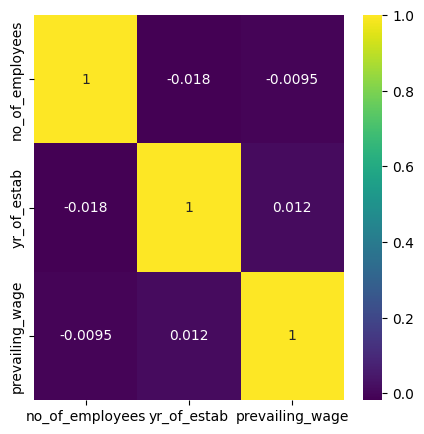

In [43]:
# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()


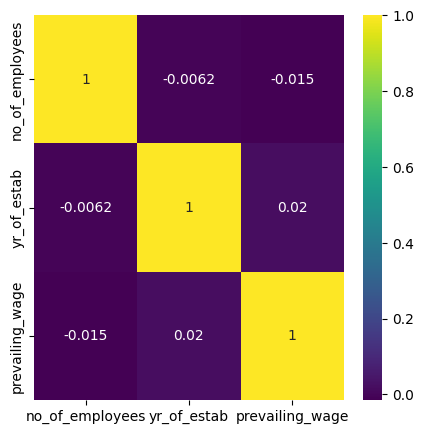

In [47]:
spearman_corr = df[numerical_features].corr(method='spearman')
# Visualize the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(spearman_corr, annot=True, cmap='viridis')
plt.show()


#### Insight:

- There seems to be no correlation between the numerical columns

In [52]:
from scipy.stats import spearmanr

# Spearman correlation between two columns
import pandas as pd
from scipy.stats import spearmanr

# Dataset

# Calculate Spearman's rank correlation for each pair
for col1 in df[numerical_features].columns:
    for col2 in df[numerical_features].columns:
        if col1 != col2:
            corr, p_value = spearmanr(df[col1], df[col2])
            print(f"Spearman Correlation between {col1} and {col2}: {corr}, p-value: {p_value}")


Spearman Correlation between no_of_employees and yr_of_estab: -0.006214003680297675, p-value: 0.32126167055499727
Spearman Correlation between no_of_employees and prevailing_wage: -0.01519701399423412, p-value: 0.015273097688059295
Spearman Correlation between yr_of_estab and no_of_employees: -0.006214003680297674, p-value: 0.32126167055499727
Spearman Correlation between yr_of_estab and prevailing_wage: 0.01956553604320156, p-value: 0.0017884399376954963
Spearman Correlation between prevailing_wage and no_of_employees: -0.01519701399423412, p-value: 0.015273097688059295
Spearman Correlation between prevailing_wage and yr_of_estab: 0.01956553604320156, p-value: 0.0017884399376954963


#### P-value interpretation : 

- It tests the null hypothesis that there is no association between the two variables.


- A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis, suggesting a significant relationship.


- A large p-value (typically > 0.05) suggests that the correlation is not statistically significant.


### Interpretation of the Results:

1. **Correlation between `no_of_employees` and `yr_of_estab`**:
   - Spearman correlation: **-0.0062**
     - This indicates a **very weak negative monotonic** relationship.
     - As `yr_of_estab` increases (older establishments), the number of employees tends to slightly decrease, but the effect is almost negligible.
   - P-value: **0.321**
     - The p-value is greater than 0.05, meaning this weak negative relationship is **not statistically significant**.

2. **Correlation between `no_of_employees` and `prevailing_wage`**:
   - Spearman correlation: **-0.0152**
     - This indicates a very weak negative monotonic relationship.
     - As the number of employees increases, the prevailing wage tends to slightly decrease, but the effect is very small.
   - P-value: **0.015**
     - The p-value is less than 0.05, meaning this weak negative relationship is **statistically significant**. While the relationship is weak, it's unlikely due to random chance.

3. **Correlation between `yr_of_estab` and `prevailing_wage`**:
   - Spearman correlation: **0.0196**
     - This shows a very weak positive monotonic relationship.
     - Older establishments tend to have slightly higher prevailing wages, but the effect is very small.
   - P-value: **0.0018**
     - The p-value is less than 0.05, meaning this weak positive relationship is **statistically significant**.



### Summary of Insights:
- **No strong correlations** exist between `no_of_employees`, `yr_of_estab`, and `prevailing_wage`, as all correlations are close to zero.


- However, the **relationship between `yr_of_estab` and `prevailing_wage`** and the **relationship between `no_of_employees` and `prevailing_wage`** are statistically significant, even though the correlation values are weak.


- The negative correlations suggest that as the number of employees increases, the prevailing wage decreases slightly, but the effect is minimal.



Given the **small correlation coefficients** (close to 0), the relationships are not strong, but the **p-values** for some relationships indicate that they are statistically significant. This suggests that while the effect is weak, it's consistent enough to be considered non-random.

In [72]:

def type_multicollinearity(x):
    x = int(x)
    if x==1:
        return "No multicollinearity"
    elif (x>1) & (x<=5):
        return "Moderate multicollinearity"
    else:
        return "High multicollinearity"


In [73]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Extract the numerical features from the dataset
X = df[numerical_features]

# Add a constant term for the intercept
X['Intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data['type'] = vif_data['VIF'].apply(type_multicollinearity)


print(vif_data)


           feature          VIF                    type
0  no_of_employees     1.000403    No multicollinearity
1      yr_of_estab     1.000464    No multicollinearity
2  prevailing_wage     1.000239    No multicollinearity
3        Intercept  2185.777087  High multicollinearity


#### Insight
- no_of_employees VIF = 1.0004: Very low multicollinearity.
- yr_of_estab VIF = 1.0005: Almost no multicollinearity.
- prevailing_wage VIF = 1.0002: No multicollinearity.
- Intercept VIF = 2185.777: A high VIF for the intercept is expected, so this value isn't concerning.



- There seems to be no multicollinearity as corr values are very less and VIF value less 5-10 indicates no multicollinearity. 

### Check Multicollinearity for Categorical features

- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test



- A chi-square statistic is one way to show a relationship between two categorical variables.



- Here we test correlation of Categorical columns with Target column i.e case_status

In [76]:
categorical_features

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

Null Hypothesis ($H_0$): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($H_1$)
): The Feature and Target column are not independent (Correalted)

In [85]:
cat_cols = ['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position']
cat_cols

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position']

In [87]:
from scipy.stats import chi2_contingency


In [89]:
for feature in cat_cols:
    print(chi2_contingency(pd.crosstab(df['case_status'],df[feature])))

Chi2ContingencyResult(statistic=351.38040803815284, pvalue=8.828798103147952e-74, dof=5, expected_freq=array([[  368.01091052, 11261.40102041,  2492.58932496,  2198.71491366,
          128.23610675,   569.0477237 ],
       [  182.98908948,  5599.59897959,  1239.41067504,  1093.28508634,
           63.76389325,   282.9522763 ]]))
Chi2ContingencyResult(statistic=2772.2072748211444, pvalue=0.0, dof=3, expected_freq=array([[6835.25164835, 1464.0288854 , 2284.20565149, 6434.51381476],
       [3398.74835165,  727.9711146 , 1135.79434851, 3199.48618524]]))
Chi2ContingencyResult(statistic=940.0580962851961, pvalue=1.9225604643164335e-206, dof=1, expected_freq=array([[7131.79764521, 9886.20235479],
       [3546.20235479, 4915.79764521]]))
Chi2ContingencyResult(statistic=1.7524844405674074, pvalue=0.18556470819406778, dof=1, expected_freq=array([[15044.36616954,  1973.63383046],
       [ 7480.63383046,   981.36616954]]))
Chi2ContingencyResult(statistic=298.4508358147679, pvalue=2.338664180505521

In [106]:
chi2_test = []
chi_dict = {}


for feature in cat_cols:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1] < 0.05:
        chi2_test.append('Reject null hypothesis')
        chi_dict[feature] = chi2_test[-1]
    else:
        chi2_test.append('Fail to reject the null hypothesis')
        chi_dict[feature] = chi2_test[-1]
   
result = pd.DataFrame(chi_dict.values(),index=chi_dict.keys()).reset_index()
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject null hypothesis
1,education_of_employee,Reject null hypothesis
2,has_job_experience,Reject null hypothesis
3,requires_job_training,Fail to reject the null hypothesis
4,region_of_employment,Reject null hypothesis
5,unit_of_wage,Reject null hypothesis
6,full_time_position,Reject null hypothesis


In [96]:
chi_dict

{'continent': 'Reject null hypothesis',
 'education_of_employee': 'Reject null hypothesis',
 'has_job_experience': 'Reject null hypothesis',
 'requires_job_training': 'Fail to reject the null hypothesis',
 'region_of_employment': 'Reject null hypothesis',
 'unit_of_wage': 'Reject null hypothesis',
 'full_time_position': 'Reject null hypothesis'}

- Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Outlier detection for numerical cols